<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/01_neural_network_regression_with_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.Create your own regression dataset and build fit a model to it**



In [ ]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.5.0'

In [ ]:
# Create regression data set
X = np.arange(-200, 200, 2)
y = X*X + 100


In [ ]:
# Split dataset into training_data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(160, 160)

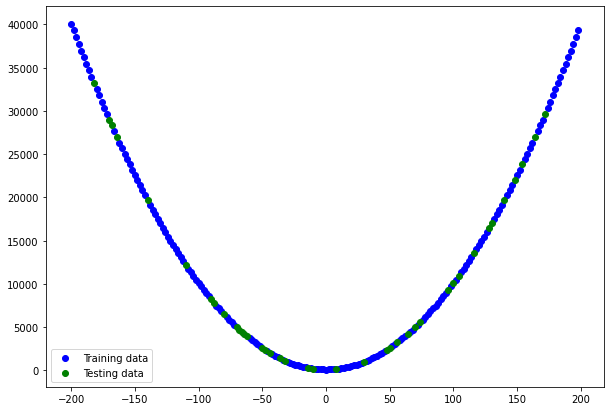

In [ ]:
# Visualization input data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()


In [ ]:
# Create a plotting function with prediction 
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  plt.figure(figsize=(10, 7))
  # Plot trainig data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions") 
  # Show a legend
  plt.legend()


In [ ]:
# Let's build our first model with 1 hidden layers, optimizer SGD and train with epochs = 100
tf.random.set_seed(42)
# 1. Build a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.3066 - mae: 14118.3066
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 14120.1748 - mae: 14120.1748
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.4814 - mae: 14118.4814
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 14119.3535 - mae: 14119.3535
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.7051 - mae: 14117.7051
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.5703 - mae: 14117.5703
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.0996 - mae: 14118.0996
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.4033 - mae: 14118.4033
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 14117.0918 - mae: 14117.0918
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.0654 - mae: 14118.0654

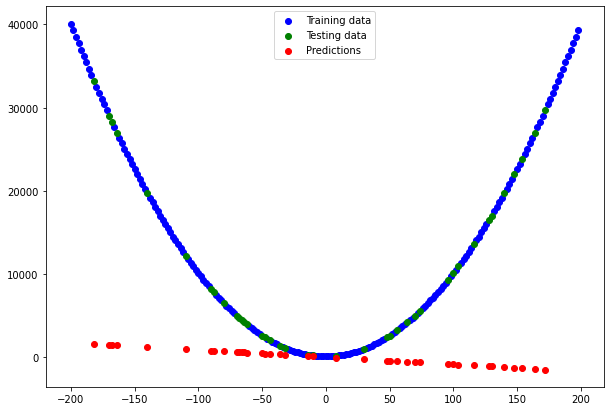

In [ ]:
# Make and plot our model's prediction
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train, X_test, y_test, y_preds_1)

In [ ]:
# Let's improve our model
tf.random.set_seed(42)
# 1. Build the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.7734 - mae: 14118.7734
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 14125.4219 - mae: 14125.4219
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.7012 - mae: 14118.7012
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 14121.0566 - mae: 14121.0566
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 14117.1074 - mae: 14117.1074
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 14116.5098 - mae: 14116.5098
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 14120.2002 - mae: 14120.2002
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.5840 - mae: 14118.5840
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 14116.4404 - mae: 14116.4404
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 14118.5938 - mae: 14118.5938

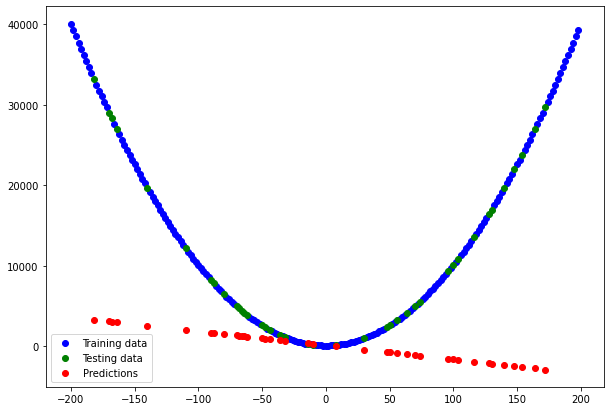

In [ ]:
# Let's make and plot again
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [ ]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 10617.7598 - mae: 10617.7598


[10617.759765625, 10617.759765625]

In [ ]:
y_test.mean()

10702.8

In [ ]:
# I will train for more time
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
history = model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.7734 - mae: 14118.7734
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 14125.4219 - mae: 14125.4219
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.7012 - mae: 14118.7012
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 14121.0566 - mae: 14121.0566
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 14117.1074 - mae: 14117.1074
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 14116.5098 - mae: 14116.5098
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 14120.2002 - mae: 14120.2002
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.5840 - mae: 14118.5840
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 14116.4404 - mae: 14116.4404
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 14118.5938 - mae: 14118.5938

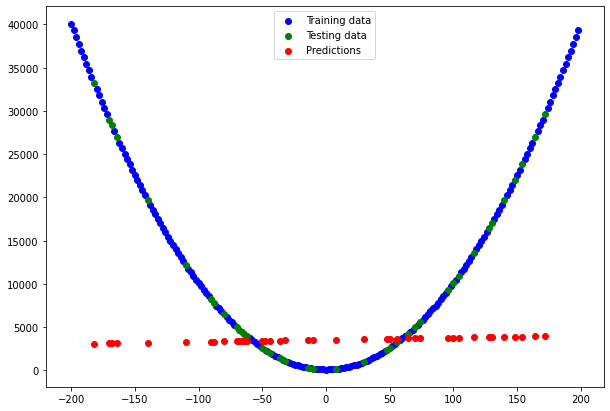

In [ ]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

Text(0.5, 0, 'epochs')

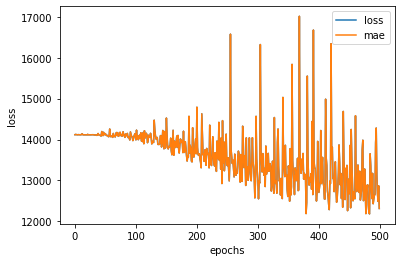

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")